In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
actions = ['move', 'stay']
reward_table = np.array([[2, 1],
                         [3, 0]])
# q_table = np.zeros([2,2])
q_table = np.array([[2, 2],
                    [3, 0]])
alpha = 0.5
gamma = 0.9
epsil = 0.3
s_init = 0
counter = 0

# greedy = np.random.random()
# if greedy > epsil:
if counter == 0:
    s_now = s_init
action_index = q_table[s_now].argmax()
action_index

0

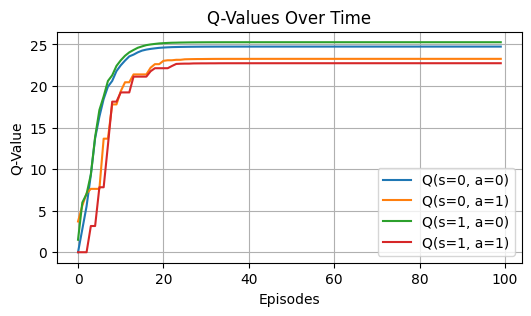

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize parameters
states = [0, 1]
actions = [0, 1]
Q = np.zeros((len(states), len(actions)))  # Q-table: 2 states x 2 actions
rewards = {
    (0, 0): (1, 2),  # (next_state, reward) for (state=0, action=0)
    (0, 1): (0, 1),  # (next_state, reward) for (state=0, action=1)
    (1, 0): (0, 3),  # (next_state, reward) for (state=1, action=0)
    (1, 1): (1, 0),  # (next_state, reward) for (state=1, action=1)
}

# Hyperparameters
alpha = 0.5  # Learning rate
gamma = 0.9  # Discount factor
epsilon = 0.3  # Exploration rate
episodes = 100  # Number of episodes

# Tracking Q-values over episodes
q_values_history = {key: [] for key in [(s, a) for s in states for a in actions]}

# Q-learning loop
for episode in range(episodes):
    state = np.random.choice(states)  # Start in a random state
    
    for step in range(10):  # Limit steps per episode to avoid infinite loops
        # Epsilon-greedy action selection
        if np.random.rand() < epsilon:
            action = np.random.choice(actions)  # Explore
        else:
            action = np.argmax(Q[state])  # Exploit

        # Environment transition
        next_state, reward = rewards[(state, action)]

        # Q-value update
        Q[state, action] += alpha * (
            reward + gamma * np.max(Q[next_state]) - Q[state, action]
        )

        # Update state
        state = next_state

    # Save Q-values after this episode
    for (s, a) in q_values_history:
        q_values_history[(s, a)].append(Q[s, a])

# Plotting Q-values
plt.figure(figsize=(6, 3))
for (s, a), q_values in q_values_history.items():
    plt.plot(range(episodes), q_values, label=f"Q(s={s}, a={a})")
plt.xlabel("Episodes")
plt.ylabel("Q-Value")
plt.title("Q-Values Over Time")
plt.legend()
plt.grid()
plt.show()
